In [6]:
import pandas as pd
import numpy as np
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

%matplotlib inline

## Classificaiton

In [7]:
from sklearn.svm import SVC, LinearSVC 

## SVC: support vector machine

- 在libsvm的基础上实现
- 时间复杂度： more than $O(n^2)$
- 对于大的样本量（比如多于10000个样本），难以很好的scale
- 多类分类问题，是基于 OVO（one vs one）的算法
- 可以实现不同的kernel函数

In [12]:
#linear_svc = LinearSVC()
linear_svc = SVC(kernel = "linear")
print linear_svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [9]:
svc = SVC()

In [10]:
print svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


- C : 浮点（float），默认值为1.0

\begin{align}
& J(\boldsymbol{w}) = \sum_{i=1}^m{\max(1-y_i{\boldsymbol{w}^T\boldsymbol{x}_i, 0)}}+\lambda \|\boldsymbol{w} \|^2 \\
\Rightarrow \ \ & J(\boldsymbol{w}) = C\sum_{i=1}^m{\max(1-y_i{\boldsymbol{w}^T\boldsymbol{x}_i, 0)}}+ \|\boldsymbol{w} \|^2 \\
\end{align}

    ** C是其他算法里正则化强度 $\lambda$ 的倒数，C越大，正则化强度越小， 容易过拟合 **
    
- kernel : 和函数，输入值是string,  默认值是 “rbf”（高斯），亦或是
    1. “linear”： 线性$\ \ k(x_1,x_2) = x_1^Tx_2$  
    
    2. “poly”： 多项式 $\ k(x_1,x_2) = (x_1^Tx_2 + r)^d $  
    
    3. "rbf": 高斯$\ \ \ k(x_1,x_2) = e^{-\frac{|x_1-x_2|^2}{2\sigma^2}} = e^{-\gamma (x_1-x_2)^2}$  
    
    4. ”sigmoid“$\ \ \ \ k(x_1,x_2) = tanh(\beta x_1^Tx_2 + \theta), \beta >0, \theta <0$
  
  
- decision function: “ovr“（one vs rest） or ”ovo“（one vs one）  
  针对于多类分类：  
  ** ovr： 会有n_labels个分类器  **  
  ** ovo： 会有n_labels(n_labels-1)/2个分类器 **

<img src = "../utils/ovr.png" style="width: 300px;"> 
<img src = "../utils/ovo.png" style="width: 300px;">

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from matplotlib.colors import ListedColormap

In [15]:
X, y = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, n_samples= 200,
                           random_state = 1, n_clusters_per_class = 1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

In [17]:
print np.unique(y)

[0 1]


In [186]:
print X.shape
print y.shape

(200, 2)
(200,)


In [187]:
# 定义plot的colormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

Text(0,0.5,u'x2')

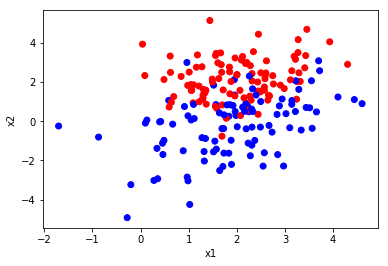

In [188]:
plt.scatter(X[:,0], X[:, 1], c = y, cmap = cm_bright)
plt.xlabel("x1")
plt.ylabel("x2")

## Linear SVM

- 大家尝试先用线性核的SVM来训练样本，计算precision，recall，f1等参量
- 尝试用mlxtend的plot decision boundary 画出分类器的决策边界

In [189]:
# 线性核函数的支持向量机去训练样本
C = 0.1
clf = SVC(kernel = "linear", C = C)

# 在训练之前对数据进行normalization
X = StandardScaler().fit_transform(X)

print X.shape, y.shape

(200, 2) (200,)


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [191]:
%%time 
clf.fit(X, y)
y_pred = clf.predict(X)

CPU times: user 2.33 ms, sys: 1.46 ms, total: 3.79 ms
Wall time: 2.09 ms


In [192]:
prec = precision_score(y_true = y, y_pred = y_pred, pos_label = 1)
rec = recall_score(y_true = y, y_pred = y_pred, pos_label = 1)
f1 = f1_score(y_true = y, y_pred = y_pred, pos_label = 1)
print "Precision score is : {:.2f}".format(prec)
print "Recall score is : {:.2f}".format(rec)
print "f1 score is : {:.2f}".format(f1)
print "Confusion matrix is :" 
print confusion_matrix(y_pred = y_pred, y_true = y)

Precision score is : 0.88
Recall score is : 0.85
f1 score is : 0.87
Confusion matrix is :
[[90 11]
 [15 84]]


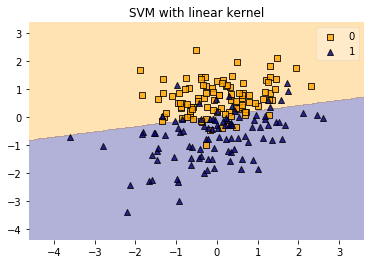

In [193]:
plot_decision_regions(X, y, clf = clf, colors = 'orange,navy')
plt.title("SVM with linear kernel")
plt.show()

## SVM with rbf kernel

In [1]:
# 同学们，可以试试高斯核函数，set gamma = 2， C = 0.1 做和线性核同样的操作

Precision score is : 0.83
Recall score is : 0.87
f1 score is : 0.85
Confusion matrix is :
[[83 18]
 [13 86]]


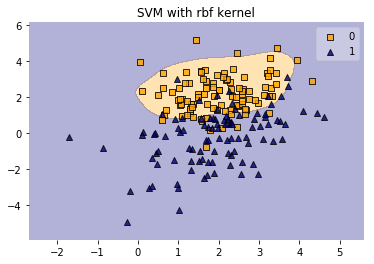

In [21]:
C = 0.1
#clf = SVC(kernel = "rbf", gamma = 2., C = C)
clf = SVC(gamma = 2., C = C)

clf.fit(X, y)
y_pred = clf.predict(X)

prec = precision_score(y_true = y, y_pred = y_pred, pos_label = 1)
rec = recall_score(y_true = y, y_pred = y_pred, pos_label = 1)
f1 = f1_score(y_true = y, y_pred = y_pred, pos_label = 1)
print "Precision score is : {:.2f}".format(prec)
print "Recall score is : {:.2f}".format(rec)
print "f1 score is : {:.2f}".format(f1)
print "Confusion matrix is :" 
print confusion_matrix(y_pred = y_pred, y_true = y)

plot_decision_regions(X, y, clf = clf, colors = 'orange,navy')
plt.title("SVM with rbf kernel")
plt.show()

In [196]:
## Play around with the paramter gamma and C
##  同学们可以自己先试试这几个paramter
## 看看SVM随着C和gamma怎么变化

C_list = [0.1, 1., 10.]
gamma_list = [0.2, 2., 20.]

## SVM 高斯核函数参数1: C

- 其中 C是惩罚系数，即对误差的宽容度
- C 越小， 正则化强度越大，容易欠拟合
- C 越大， 说明越不能容忍出现误差,容易过拟合

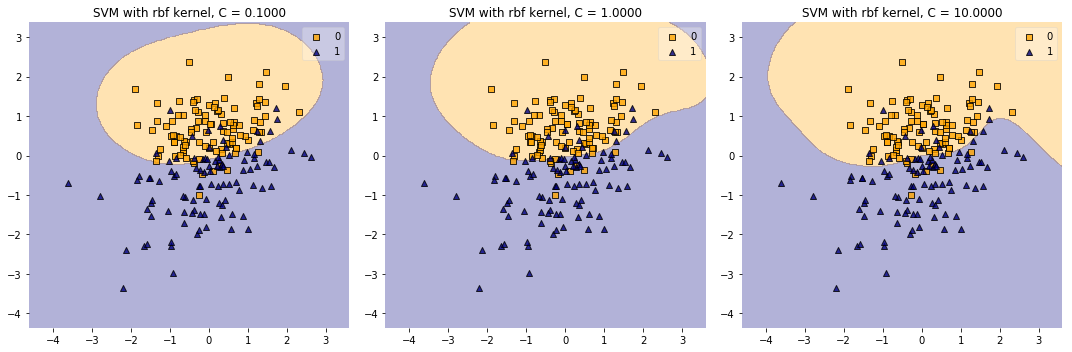

In [198]:
plt.figure(figsize = (15, 5))
for i, C in enumerate(C_list):
    clf = SVC(C = C)
    clf.fit(X, y)
    #y_pred = clf.predict(X)
    plt.subplot(1, len(C_list), i + 1)
    plot_decision_regions(X, y, clf = clf, colors = 'orange,navy')
    plt.title("SVM with rbf kernel, C = {:.4f}".format(C))
plt.tight_layout()
plt.show()

## SVM 高斯核函数参数2: gamma

- gamma是选择RBF函数作为kernel后，该函数自带的一个参数
- 隐含地决定了数据映射到新的特征空间后的分布
- gamma越大，单个样本对整个分类超平面的影响比较大，整个模型的支持向量也会多， 过拟合
- gamma值越小，单个样本对整个分类超平面的影响比较小，不容易被选择为支持向量，容易欠拟合

$$
k(x_1,x_2) = e^{-\frac{|x_1-x_2|^2}{2\sigma^2}} = e^{-\gamma (x_1-x_2)^2}
$$ 

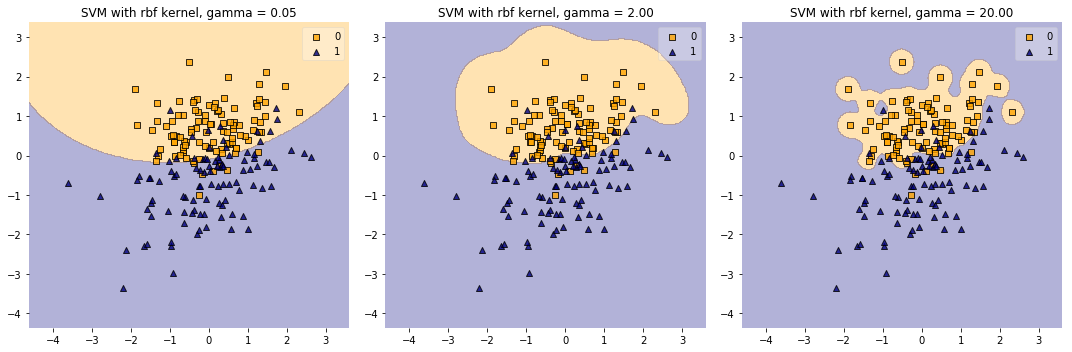

In [205]:
gamma_list = [0.05, 2., 20.]
plt.figure(figsize = (15, 5))
for i, gamma in enumerate(gamma_list):
    clf = SVC(gamma = gamma, C = 1.0)
    clf.fit(X, y)
    #y_pred = clf.predict(X)
    plt.subplot(1, len(C_list), i + 1)
    plot_decision_regions(X, y, clf = clf, colors = 'orange,navy')
    plt.title("SVM with rbf kernel, gamma = {:.2f}".format(gamma))
plt.tight_layout()
plt.show()

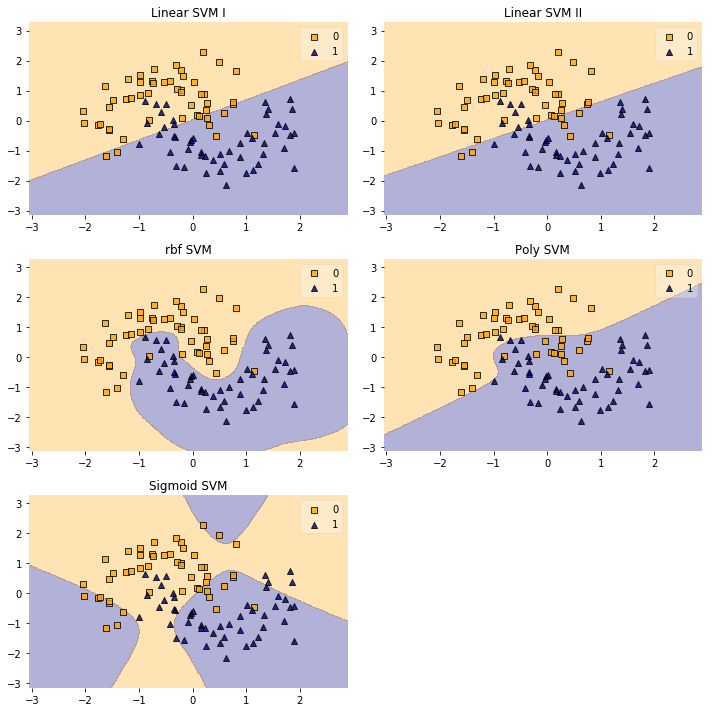

In [225]:
names = [ "Linear SVM I", "Linear SVM II", "rbf SVM", "Poly SVM", "Sigmoid SVM"]

models = [
            SVC(kernel = "linear", C = C), 
            sk.svm.LinearSVC(C = C),
            SVC(kernel = "rbf", gamma = 2, C = C), # or SVC(gamma = 2, C = 1)
            SVC(kernel = "poly", degree = 5, C = C),
            SVC(kernel = "sigmoid", C = C)
         ]

figure = plt.figure(figsize=(10, 10))
assert len(names) == len(models)
for i, (clf_name, clf) in enumerate(zip(names, models)):
    plt.subplot((len(models)+1)/2, 2, i + 1)
    clf.fit(X, y)
    plot_decision_regions(X, y, clf, colors = 'orange,navy')
    plt.title(clf_name, fontsize = 12)
plt.tight_layout()
plt.show()

## 多类分类：multiclass classficiation

- OVO
- OVR
- 同学们尝试用如下的数据集做一下多类分类

In [22]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [23]:
X2, Y2 = make_blobs(n_samples=200, n_features = 2, centers = 5, random_state=1,cluster_std = 1)

In [24]:
print np.unique(Y2)

[0 1 2 3 4]


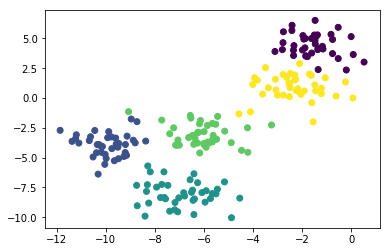

In [270]:
plt.scatter(X2[:,0], X2[:,1], c = Y2)
plt.show()

In [271]:
rbf_ovr = SVC(kernel = 'rbf', decision_function_shape = "ovr")
#rbf_ovo = SVC(kernel = 'rbf', decision_function_shape = "ovo")
rbf_ovo = OneVsOneClassifier(SVC(kernel = "rbf"))
linear_ovr = SVC(kernel = 'linear', decision_function_shape = "ovr")
#linear_ovo = SVC(kernel = 'linear', decision_function_shape = "ovo")
linear_ovo = OneVsOneClassifier(SVC(kernel = "linear"))

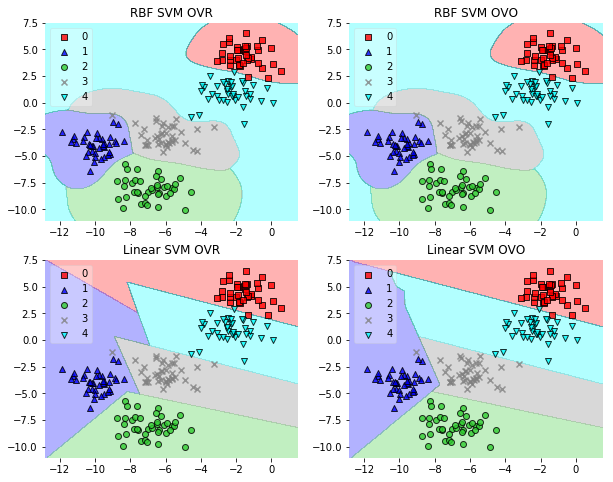

In [272]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

clfs = [rbf_ovr, rbf_ovo, linear_ovr, linear_ovo]
names = ["RBF SVM OVR", "RBF SVM OVO", "Linear SVM OVR", "Linear SVM OVO"]

for clf, lab, grd in zip(clfs, names, itertools.product([0, 1], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    clf.fit(X2, Y2)
    fig = plot_decision_regions(X=X2, y=Y2, clf=clf, legend=2)
    plt.title(lab)
plt.show()

## SVR: 支持向量回归

- 同学们可以尝试用如下的数据集做一些支持向量回归

In [273]:
from sklearn.svm import SVR

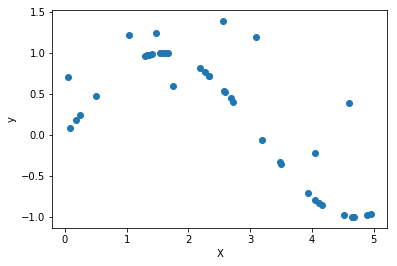

In [275]:
# 数据
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# 人为增加一些噪声
y[::5] += 3 * (0.5 - np.random.rand(8))

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

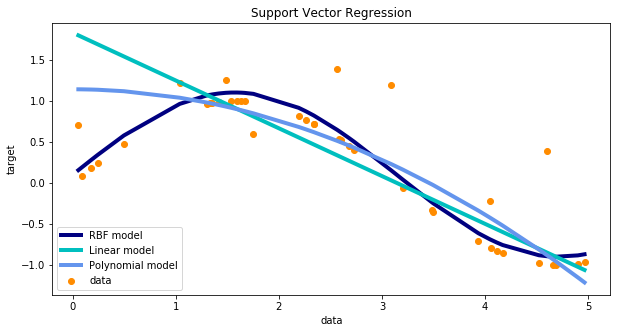

In [287]:
# SVR 拟合数据
C = 1e3
svr_rbf = SVR(kernel='rbf', C = C, gamma = 0.1)
svr_lin = SVR(kernel='linear', C = C)
svr_poly = SVR(kernel='poly', C = C, degree = 2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

lw = 4
plt.figure(figsize = (10,5))
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw = lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw = lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend(loc = 'lower left')
plt.show()

* 大家可以试试改变C的值，看看对模型有什么变化
* 还有其他参数，比如高斯核函数的gamma，多项式核函数的polynomial项